In [2]:
# Finding Azimuth Angle 
# Signal from two elements of the same antenna

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import math

In [4]:
# Size of signal
n = 1024
# Random signal
s0t = np.random.rand(n)-0.5 + 1.0j*np.random.rand(n)-0.5j
#print(s0t)

In [5]:
# Time shift

# Distance between elements (2 elements)
d = 5e-2 # 5 cm
# Azimuth Angle
az_ang0 = np.deg2rad(-60)
# Speed of light
c = 299792458 # m/s
delta_t = d*np.sin(az_ang0)/c
sample_freq = 100e6 # 100MHz
# Doing math in terms of sample index and not in seconds
delta_t_samples = delta_t * sample_freq
print("delta_t_samples = ",delta_t_samples)
print("delta_t = ",delta_t * 1e9,"ns")
print("distance = ",c*delta_t, "m") # meters

delta_t_samples =  -0.014443749011598528
delta_t =  -0.14443749011598528 ns
distance =  -0.04330127018922193 m


In [6]:
# Time shift of s0 
#s1 = s0(t-delta_t_samples) 

# FFT
s0f = np.fft.fft(s0t)

# Time shift in Fourier Domain
s1f = s0f*np.exp(-1.0j*(2*np.pi)*delta_t_samples*np.array(range(n))/n)

## This is an example of what would be fed to the NN

In [7]:
# Feed network amplitude and phase
s0f_amplitude = np.abs(s0f)
s1f_amplitude = np.abs(s1f)
s0f_phase = np.angle(s0f)
s1f_phase = np.angle(s1f)

In [8]:
# Esc + a to insert cell above
# b "" below
# m for markdown

## Cells below for testing

slope =  -8.862573395533742e-05


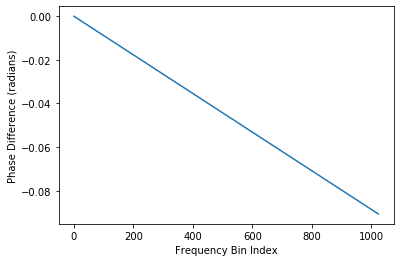

In [9]:
# Testing that shifting is working in frequency domain
# Phase difference
phase_diff = s0f_phase - s1f_phase
#plt.plot(phase_diff)

# Fix phase wrap issue
phase_diff = np.unwrap(phase_diff)
plt.plot(phase_diff)
plt.xlabel("Frequency Bin Index")
plt.ylabel("Phase Difference (radians)")

# Slope
slope = np.polyfit(range(n), phase_diff, 1)[0] # square bracket 0 selects slope
print("slope = ", slope)

In [10]:
# Compare slope to time shift
print("delta_t_samples",delta_t_samples)
#print("slope = ",slope)
time_from_slope = slope/(2*np.pi/n)
print("time_from_slope = ",time_from_slope)

delta_t_samples -0.014443749011598528
time_from_slope =  -0.014443749011598525
